In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#To read CSV data
data = pd.read_csv("C:/Users/Aditi Arora/Documents/FORE/Trimester 3/MLP/archive/train_u6lujuX_CVtuZ9i (1).csv")

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [7]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

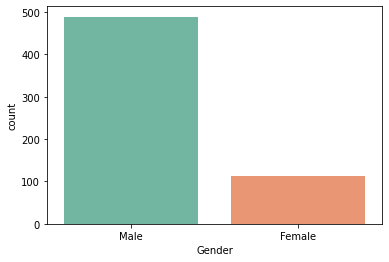

In [11]:
print(data['Gender'].value_counts())
sns.countplot(x='Gender', data=data, palette = 'Set2')

Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

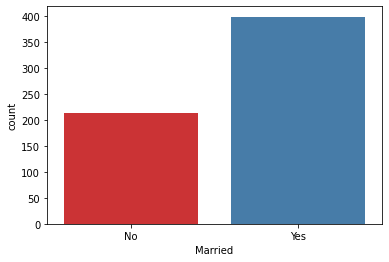

In [12]:
print(data['Married'].value_counts())
sns.countplot(x='Married', data=data, palette = 'Set1')

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


<AxesSubplot:xlabel='Education', ylabel='count'>

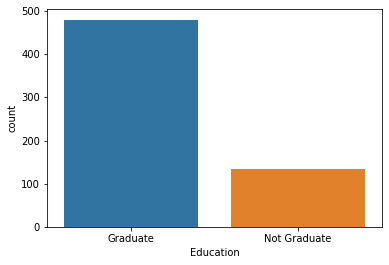

In [13]:
print(data['Education'].value_counts())
sns.countplot(x='Education', data=data)

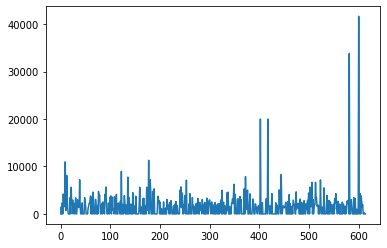

In [14]:
plt.plot(data['CoapplicantIncome'])

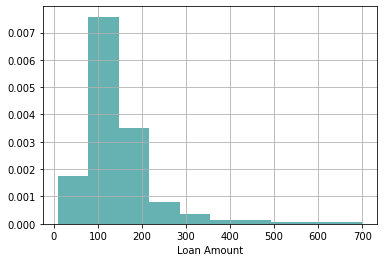

In [15]:
la = data['LoanAmount'].hist(density=True, stacked=True, color='teal', alpha=0.6)
la.set(xlabel='Loan Amount')
plt.show()

<AxesSubplot:ylabel='Loan_Status'>

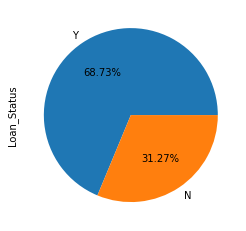

In [16]:
ls = data.Loan_Status.value_counts()
ls.head()
ls.plot.pie(labels = ("Y", "N"),autopct = "%.2f%%")

In [17]:
# Male = 0, Female = 1
data['Gender'] = data['Gender'].replace({'Male':0, 'Female':1,'unknown':2})
# Yes = 1, No = 0
data['Married'] = data['Married'].replace({'Yes':1, 'No':0, 'unknown':2})
# Graduate = 1, Not Graduate = 0
data['Education'] = data['Education'].replace({'Graduate':1, 'Not Graduate':0})
# Yes: 1
# No : 0
# unknown:2
data['Self_Employed'] = data['Self_Employed'].replace ({'Yes':1, 'No':0, 'unknown':2})
data['Property_Area'] = data['Property_Area'].replace ({'Semiurban':1, 'Urban': 0, 'Rural':2})
data['Loan_Status'] = data['Loan_Status'].replace({'Y':1, 'N':0})
data['Dependents'] = data['Dependents'].replace({'3+':3})

In [18]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [19]:
train_data = data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data["LoanAmount"].fillna(train_data["LoanAmount"].mean(skipna=True), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [20]:
X = train_data.iloc[:,1:-1]
y = train_data.iloc[:, -1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,0
1,0.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,2
2,0.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,0
3,0.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0
4,0.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,0


In [22]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [23]:
y_pred = knn.predict(X_test)

In [24]:
print("Accuracy ", knn.score(X_test, y_test)*100)

Accuracy  60.54054054054055


In [25]:
Gen = input("Input Gender: 1 for Male and 0 for Female: ")
Marr = input("If marrried? Input 1 for Yes and 0 for No: ")
Depen = input("Dependents present? \n Input 1 or 2 or 3+ (in case of more than 3): ")
Edu = input ("Education level: \n Input 0 for Not Graduate and 1 for Graduate: ")
SelfEmp = input("Self employed? \n Input 1 for Yes and 0 for No: ")
AppInc = input("Enter Applicant Income: ")
CoApInc = input("Enter Co Applicant Income: ")
LoAmt = input("Enter Loan Amount: ")
LoAmtTerm = input("Enter Loan Amount Term: ")
Crehis = input("Enter Credit History: ")
PropAre = input("Enter Property Area: 1 for Urban and 0 for Rural: ")
X_actual_values = [Gen, Marr, Depen, Edu, SelfEmp, AppInc, CoApInc, LoAmt, LoAmtTerm, Crehis, PropAre]
X_actual_values

Input Gender: 1 for Male and 0 for Female: 0
If marrried? Input 1 for Yes and 0 for No: 0
Dependents present? 
 Input 1 or 2 or 3+ (in case of more than 3): 2
Education level: 
 Input 0 for Not Graduate and 1 for Graduate: 1
Self employed? 
 Input 1 for Yes and 0 for No: 0
Enter Applicant Income: 50000
Enter Co Applicant Income: 2000
Enter Loan Amount: 100000
Enter Loan Amount Term: 2
Enter Credit History: 1
Enter Property Area: 1 for Urban and 0 for Rural: 1


['0', '0', '2', '1', '0', '50000', '2000', '100000', '2', '1', '1']

In [27]:
X_actual_values = np.array(X_actual_values).astype('int16')
X_actual_values = X_actual_values.reshape(1,11)
X_actual_values = pd.DataFrame(X_actual_values)
X_actual_values.columns = (['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
y_actual_pred = knn.predict(X_actual_values)
print('Should the person be given a loan? \n1 for Yes and 0 for No. \nAs per KNN the answer is: ', y_actual_pred)

Should the person be given a loan? 
1 for Yes and 0 for No. 
As per KNN the answer is:  [1]
